# Churn Rate Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/adedayo/Desktop/datasets/Churn_Modelling.csv")

df.head(5)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df['RowNumber'] = df['RowNumber'].astype(str)

df['CustomerId'] = df['CustomerId'].astype(str)

In [5]:
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

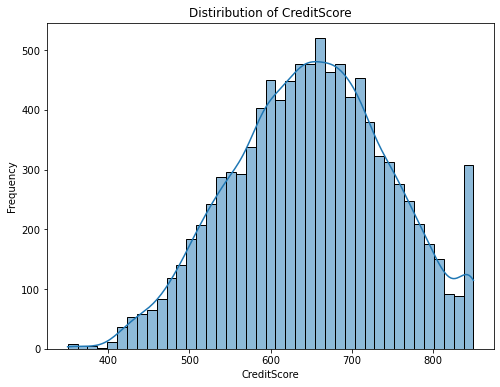

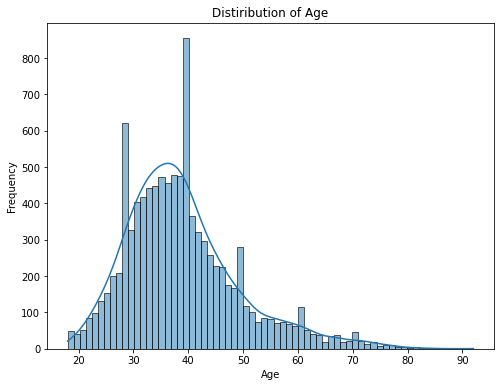

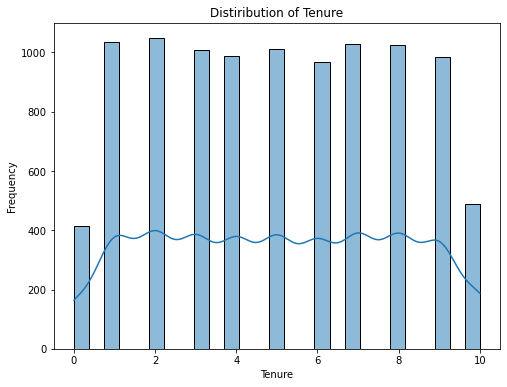

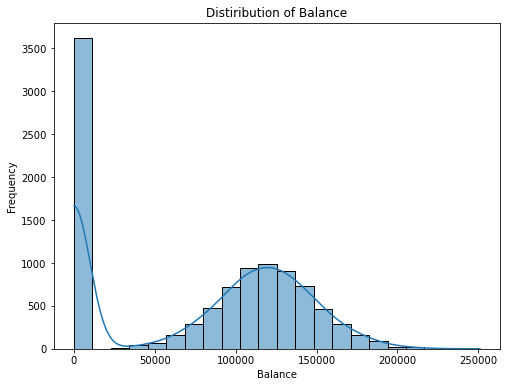

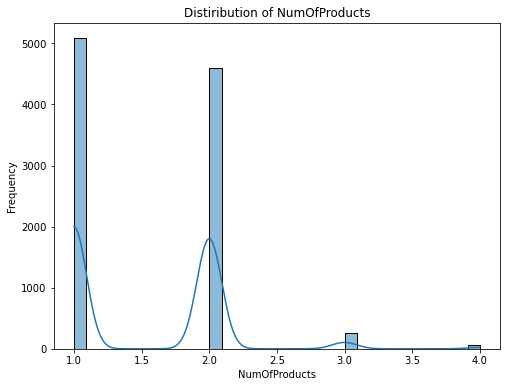

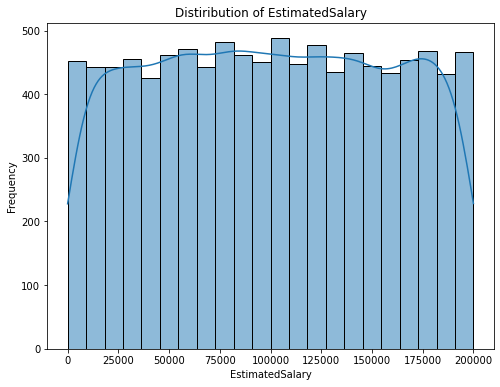

In [6]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for cols in num_cols:
    plt.figure(figsize = (8,6))
    sns.histplot(df[cols], kde = True)
    plt.title(f'Distiribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')

plt.show()

<AxesSubplot:xlabel='Exited', ylabel='Age'>

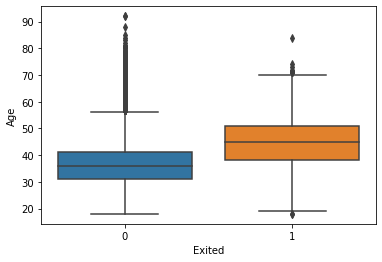

In [7]:
sns.boxplot(x = 'Exited', y = 'Age', data = df)

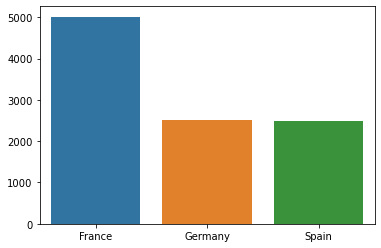

In [8]:
geo_churn_rate = df['Geography'].value_counts()

sns.barplot(x = geo_churn_rate.index, y = geo_churn_rate.values)

plt.show()

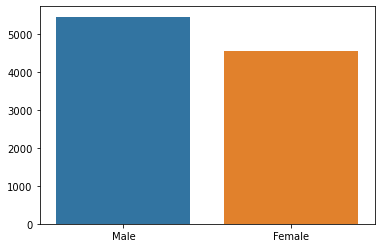

In [9]:
gender_churn_rate = df['Gender'].value_counts()

sns.barplot(x = gender_churn_rate.index, y = gender_churn_rate.values)

plt.show()

/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


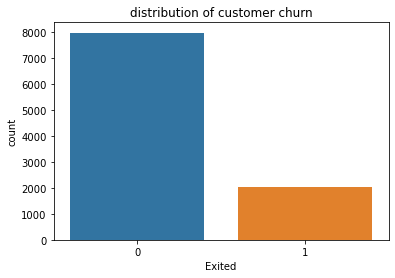

In [10]:
sns.countplot(df['Exited'])

plt.title('distribution of customer churn')

plt.show()

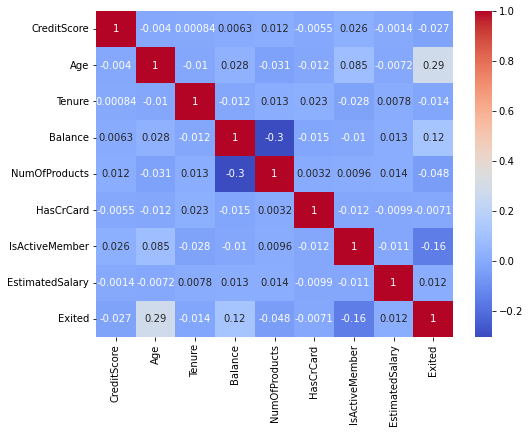

In [11]:
plt.figure(figsize = (8,6))

sns.heatmap(df.corr(), annot= True, cmap='coolwarm')

plt.show()

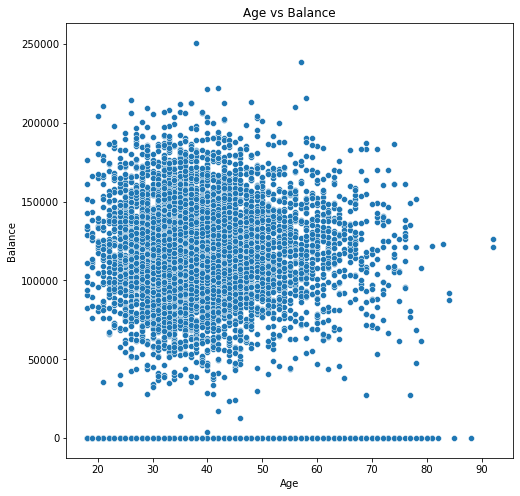

In [12]:
plt.figure(figsize = (8,8))

sns.scatterplot(x = 'Age', y = 'Balance', data = df)

plt.title('Age vs Balance')

plt.show()

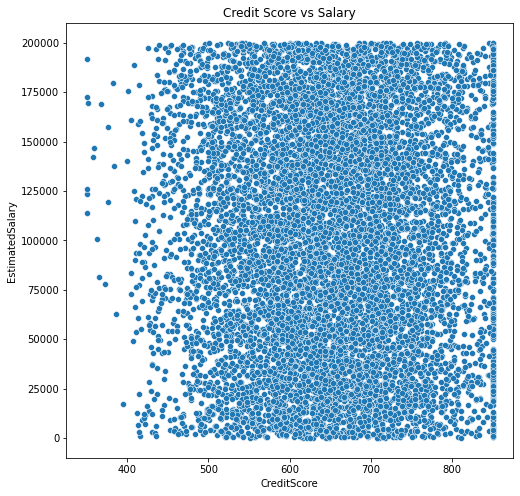

In [13]:
plt.figure(figsize=(8,8))

sns.scatterplot(x = 'CreditScore', y = 'EstimatedSalary', data = df)

plt.title('Credit Score vs Salary')

plt.show()

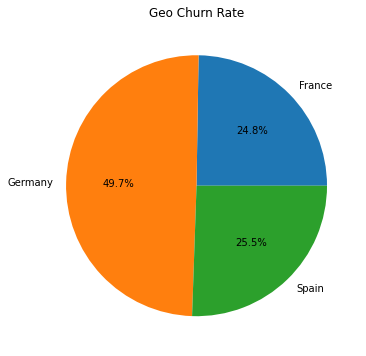

In [14]:
geo_rate = df.groupby('Geography')['Exited'].mean()

plt.figure(figsize=(8,6))

plt.pie(x = geo_rate, labels= geo_rate.index, autopct='%1.1f%%')

plt.title('Geo Churn Rate')

plt.show()

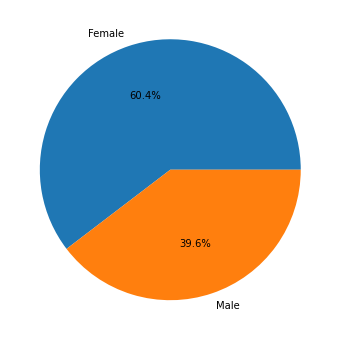

In [15]:
gender_rate = df.groupby('Gender')['Exited'].mean()

plt.figure(figsize = (8,6))

plt.pie(x = gender_rate, labels = gender_rate.index, autopct='%1.1f%%')

plt.show()

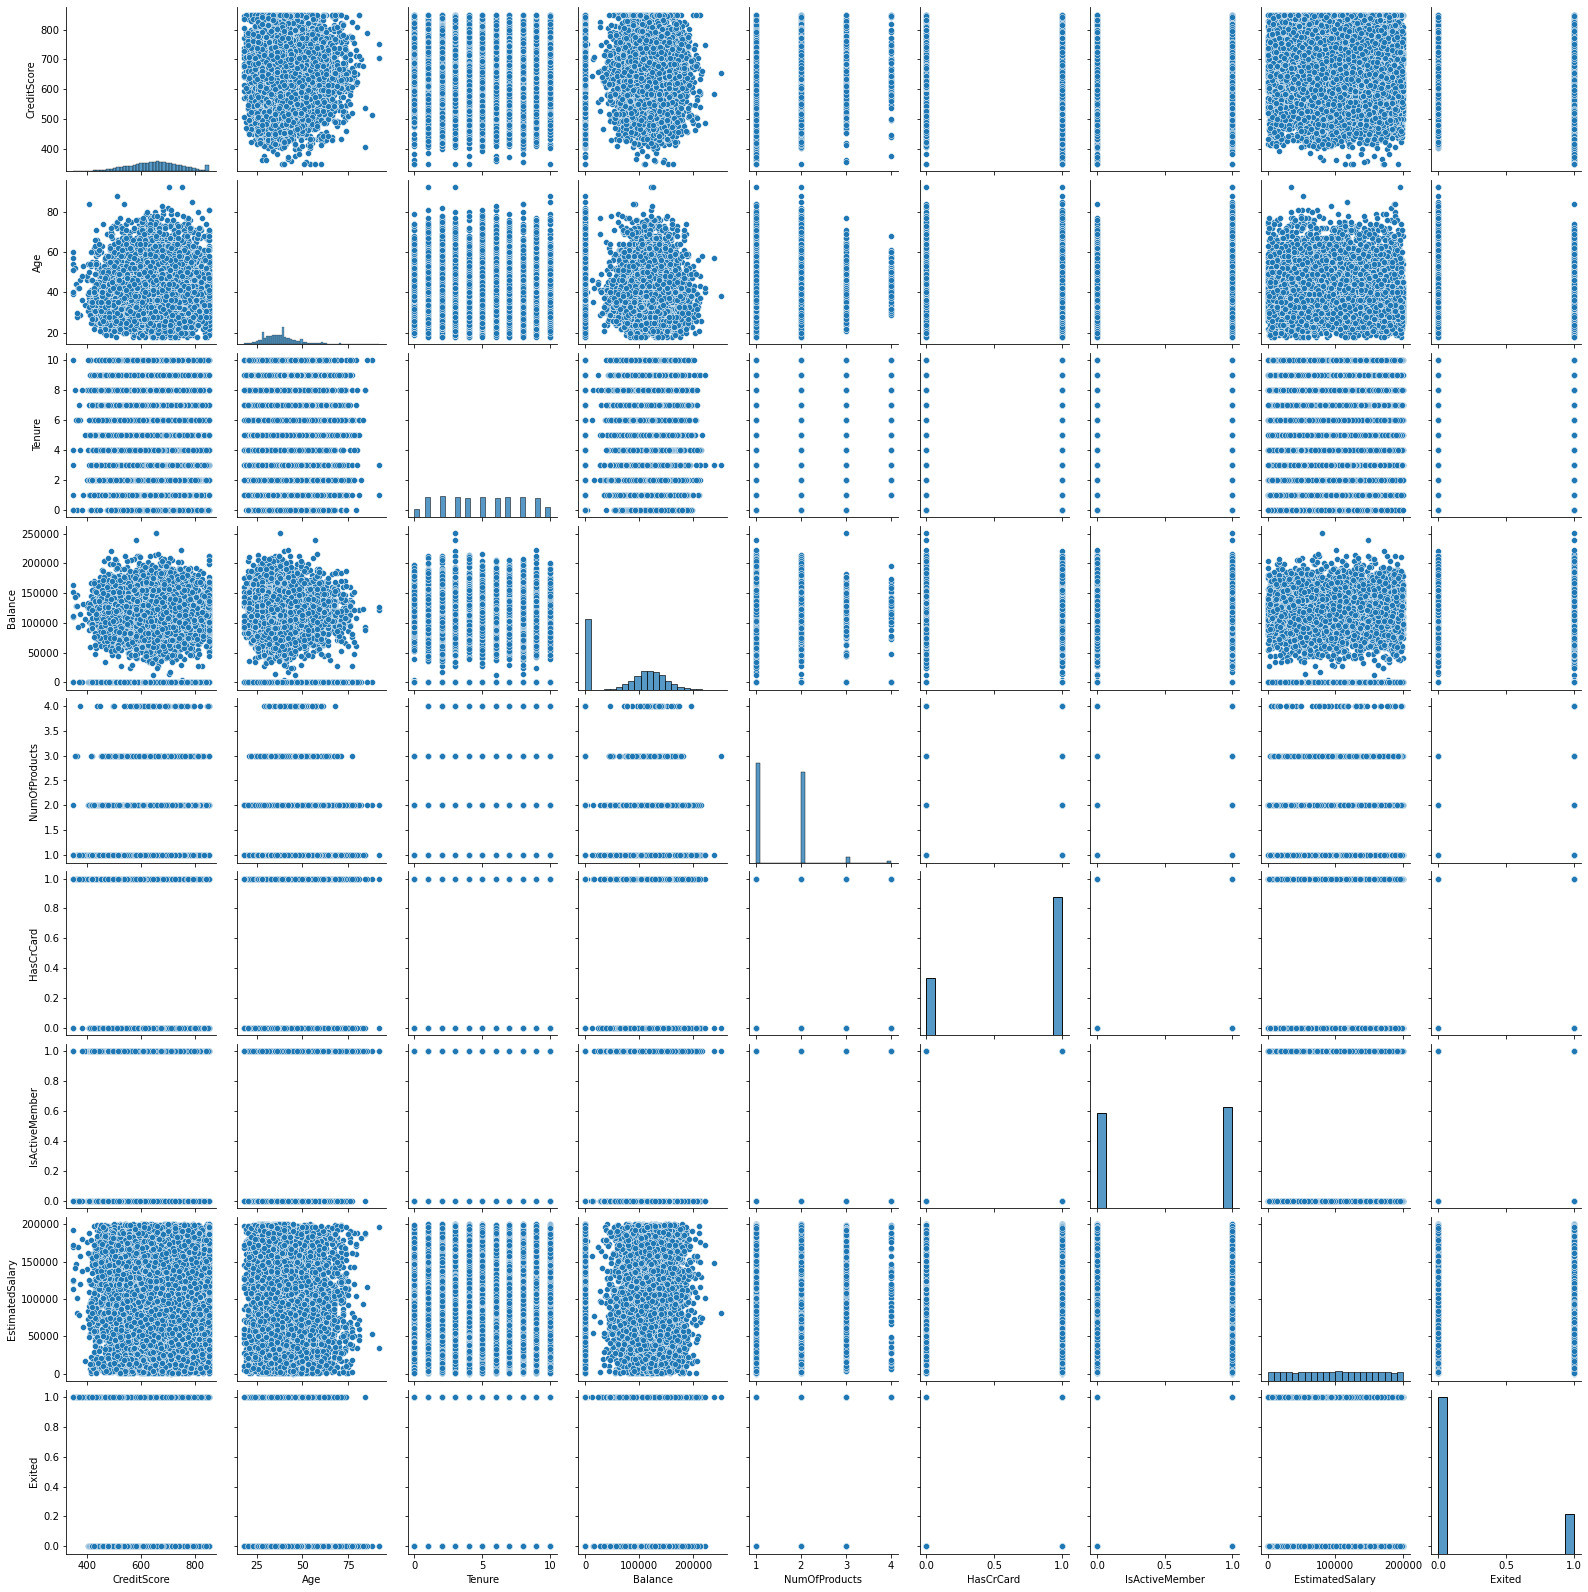

In [16]:
sns.pairplot(df)

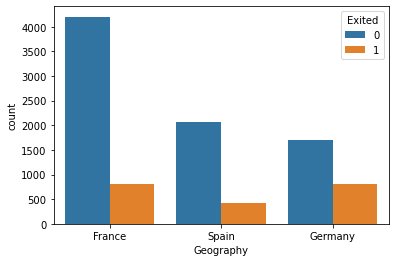

In [17]:
sns.countplot(x = df['Geography'], hue = df['Exited'])

plt.show()

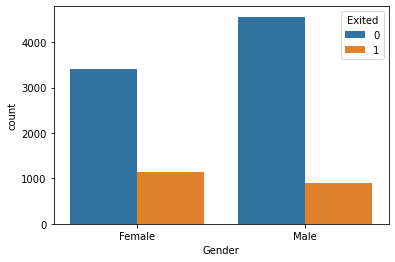

In [18]:
sns.countplot(x = df['Gender'], hue = df['Exited'])

plt.show()

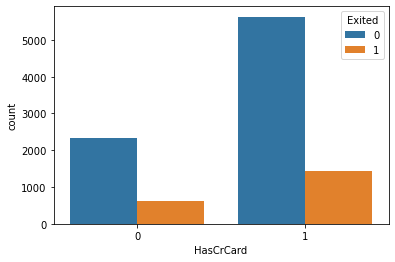

In [19]:
sns.countplot(x = df['HasCrCard'], hue = df['Exited'])

plt.show()

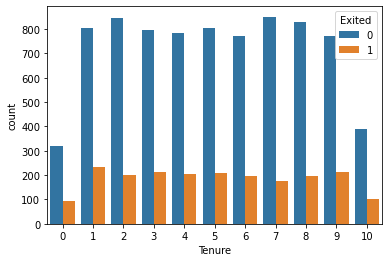

In [20]:
sns.countplot(x = df['Tenure'], hue = df['Exited'])

plt.show()

/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


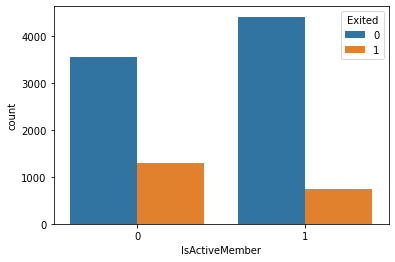

In [21]:
sns.countplot(df['IsActiveMember'], hue = df['Exited'])

plt.show()

In [22]:
geo = pd.get_dummies(df['Geography'], drop_first=True)

gender = pd.get_dummies(df['Gender'], drop_first=True)

df = pd.concat([df, gender, geo], axis = 1)

df.head(5)

RowNumber CustomerId   Surname  CreditScore Geography  Gender  Age  Tenure  \
0         1   15634602  Hargrave          619    France  Female   42       2   
1         2   15647311      Hill          608     Spain  Female   41       1   
2         3   15619304      Onio          502    France  Female   42       8   
3         4   15701354      Boni          699    France  Female   39       1   
4         5   15737888  Mitchell          850     Spain  Female   43       2   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              1          1               1        101348.88   
1   83807.86              1          0               1        112542.58   
2  159660.80              3          1               0        113931.57   
3       0.00              2          0               0         93826.63   
4  125510.82              1          1               1         79084.10   

   Exited  Male  Germany  Spain  
0       1     0        0      0  
1       0     0        0      1  
2       1     0        0      0  
3       0     0        0      0  
4       0     0        0      1

In [23]:
df.drop(['Geography', 'Gender', 'Surname', 'RowNumber', 'CustomerId'], axis = 1, inplace = True)

df.head(5)

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Male  Germany  Spain  
0               1        101348.88       1     0        0      0  
1               1        112542.58       0     0        0      1  
2               0        113931.57       1     0        0      0  
3               0         93826.63       0     0        0      0  
4               1         79084.10       0     0        0      1

In [24]:
X = df.drop(['Exited'], axis = 1)

y = df['Exited']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

LogisticRegression()

In [29]:
pred = logmodel.predict(X_test)

pred

array([0, 0, 0, ..., 0, 1, 0])

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2657
           1       0.45      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.63      0.53      0.51      3300
weighted avg       0.74      0.80      0.74      3300



In [31]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
print(results)

      Actual  Predicted
6252       0          0
4684       0          0
1731       0          0
4742       0          1
4521       0          0
...      ...        ...
1744       0          0
9754       0          0
6094       0          0
8781       0          1
9401       1          0

[3300 rows x 2 columns]


### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfClassifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4,max_depth=None,
                                     random_state=42)

rfClassifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [34]:
y_pred = rfClassifier.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2657
           1       0.77      0.47      0.58       643

    accuracy                           0.87      3300
   macro avg       0.82      0.72      0.75      3300
weighted avg       0.86      0.87      0.86      3300



In [36]:
result2 = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})

result2

Actual  Predicted
6252       0          0
4684       0          0
1731       0          0
4742       0          0
4521       0          0
...      ...        ...
1744       0          0
9754       0          0
6094       0          0
8781       0          0
9401       1          1

[3300 rows x 2 columns]

## Personal Loan Prediction

In [37]:
df = pd.read_csv("/Users/adedayo/Desktop/datasets/Bank_Personal_Loan_Modelling.csv")

df.head()

ID  Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP_Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [39]:
df.drop(['ID', 'ZIP_Code'], axis = 1, inplace = True)

df.head(2)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   

   Securities_Account  CD_Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0

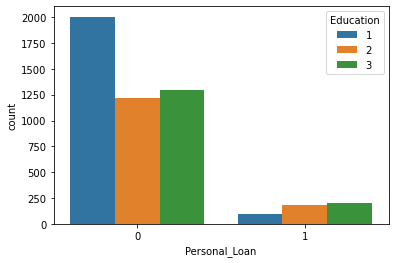

In [40]:
sns.countplot(x = df['Personal_Loan'], hue = df['Education'])

plt.show()

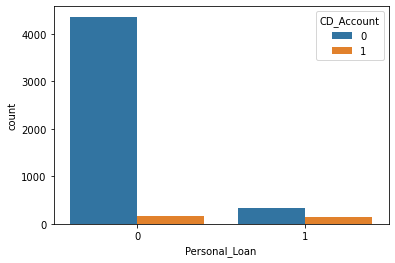

In [41]:
sns.countplot(x = df['Personal_Loan'], hue = df['CD_Account'])

plt.show()

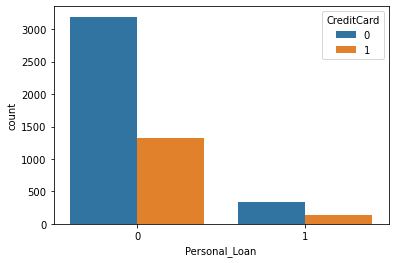

In [42]:
sns.countplot(x = df['Personal_Loan'], hue = df['CreditCard'])

plt.show()

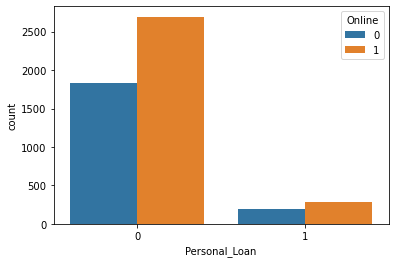

In [43]:
sns.countplot(x = df['Personal_Loan'], hue = df['Online'])

plt.show()

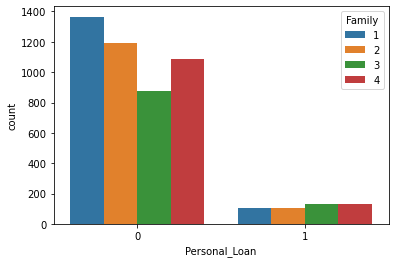

In [44]:
sns.countplot(x = df['Personal_Loan'], hue = df['Family'])

plt.show()

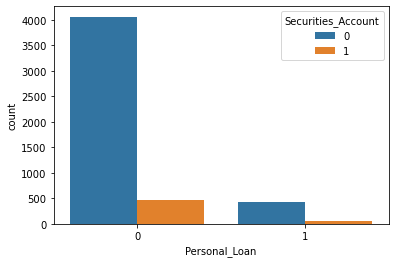

In [45]:
sns.countplot(x = df['Personal_Loan'], hue = df['Securities_Account'])

plt.show()

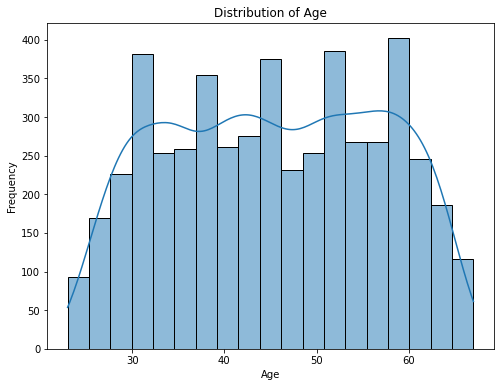

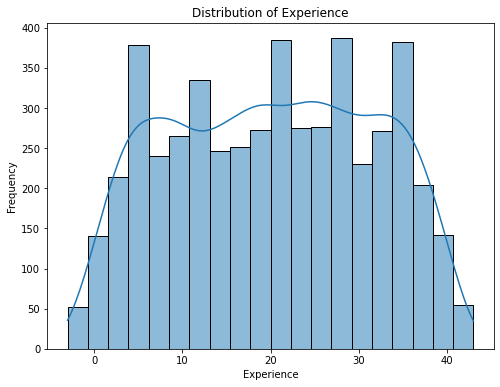

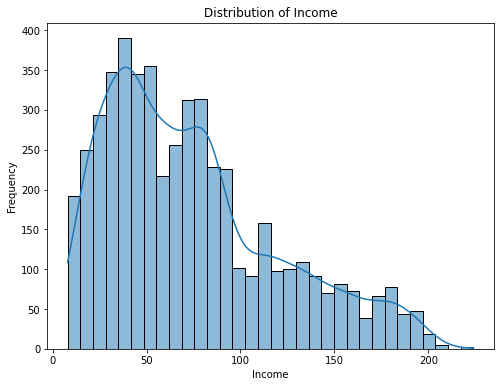

In [46]:
num_cols = ['Age', 'Experience', 'Income']

for cols in num_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[cols], kde = True)
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
plt.show()        

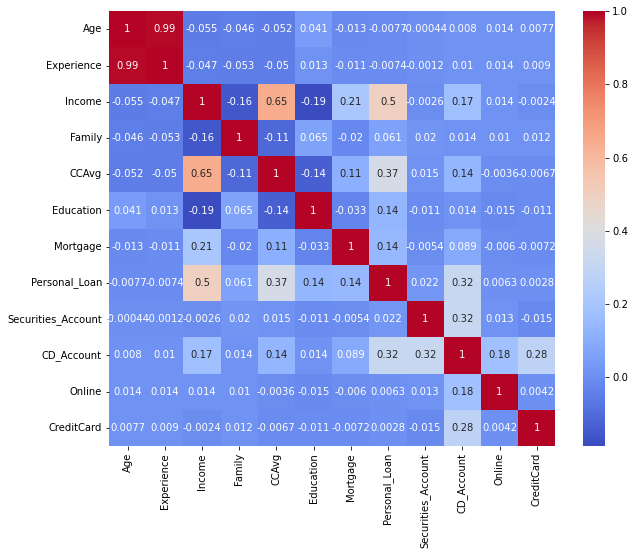

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

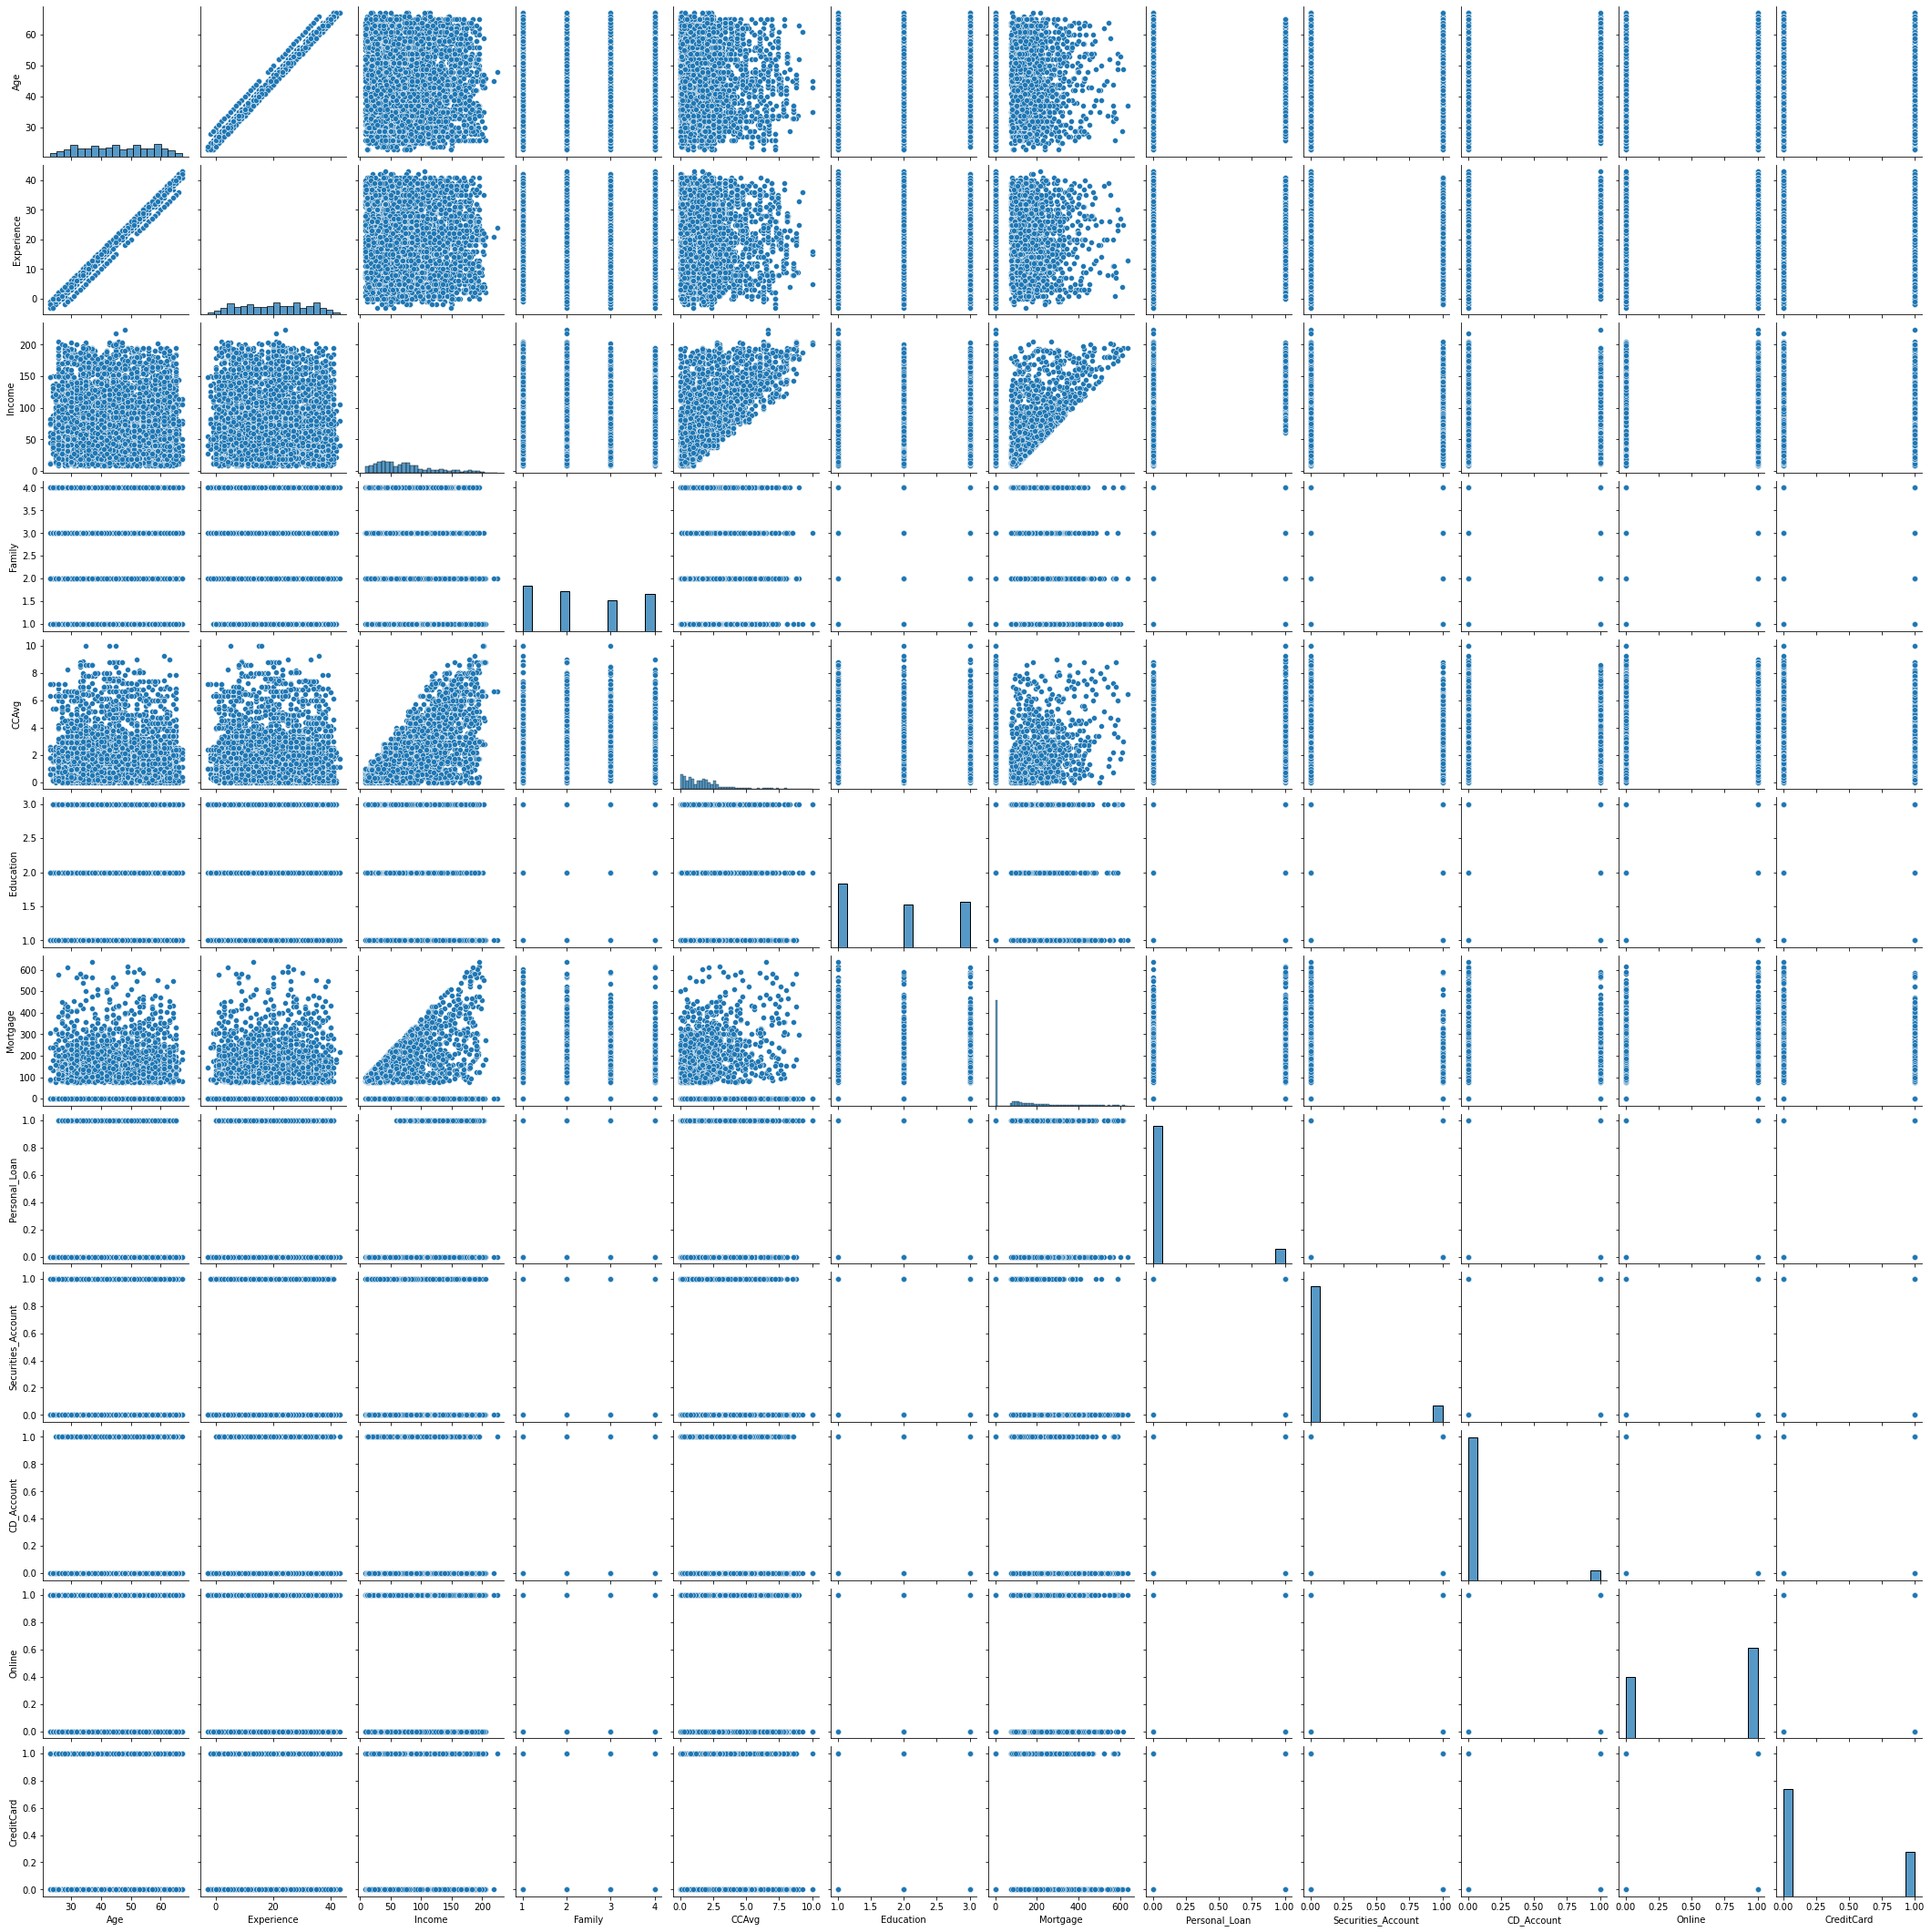

In [48]:
sns.pairplot(df)

In [49]:
X = df.drop(['Personal_Loan'], axis = 1)

y = df['Personal_Loan']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [54]:
pred = logmodel.predict(X_test)

pred

array([0, 0, 0, ..., 1, 0, 0])

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1480
           1       0.85      0.62      0.72       170

    accuracy                           0.95      1650
   macro avg       0.90      0.81      0.85      1650
weighted avg       0.95      0.95      0.95      1650



In [56]:
result = pd.DataFrame({'Actual':y_test, 'Predicted':pred})

result

Actual  Predicted
1501       0          0
2586       1          0
2653       0          0
1055       0          0
705        0          0
...      ...        ...
908        0          0
2114       0          0
3896       0          1
1627       0          0
2873       0          0

[1650 rows x 2 columns]

### Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfClassifier = RandomForestClassifier(n_estimators = 100, min_samples_split=2, min_samples_leaf=4, random_state=42)

rfClassifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [59]:
pred = rfClassifier.predict(X_test)

pred

array([0, 1, 0, ..., 0, 0, 0])

In [60]:
result = pd.DataFrame({'Actual':y_test,'Predicted':pred})

result

Actual  Predicted
1501       0          0
2586       1          1
2653       0          0
1055       0          0
705        0          0
...      ...        ...
908        0          0
2114       0          0
3896       0          0
1627       0          0
2873       0          0

[1650 rows x 2 columns]

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1480
           1       0.97      0.89      0.93       170

    accuracy                           0.99      1650
   macro avg       0.98      0.94      0.96      1650
weighted avg       0.99      0.99      0.99      1650



## Home Loan Prediction

In [62]:
df = pd.read_csv("/Users/adedayo/Desktop/datasets/train.csv")

df.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [64]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
df.dropna(inplace = True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [67]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

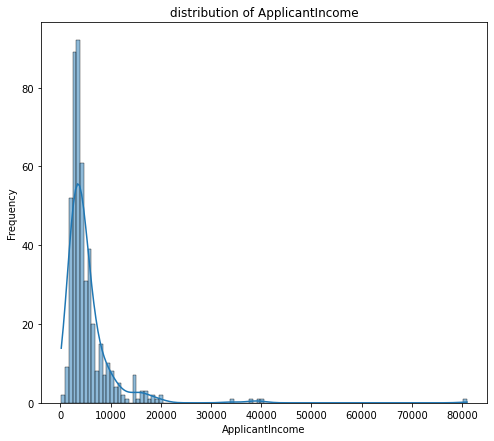

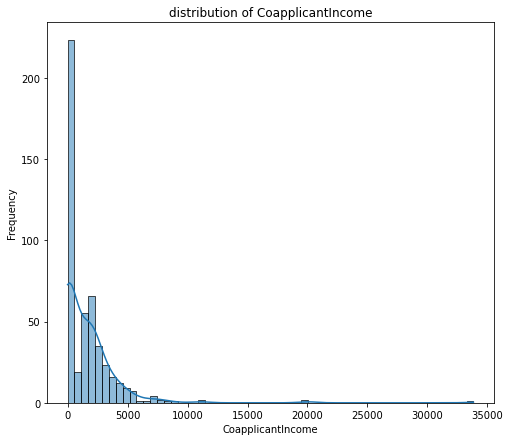

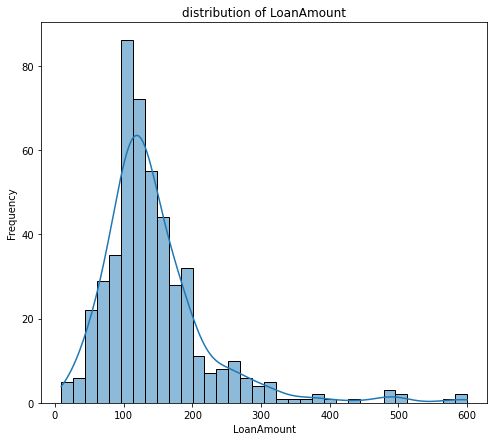

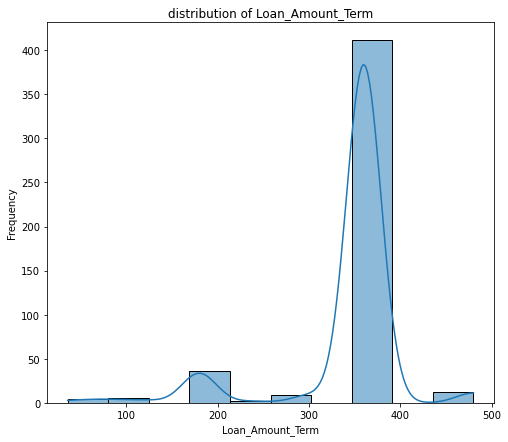

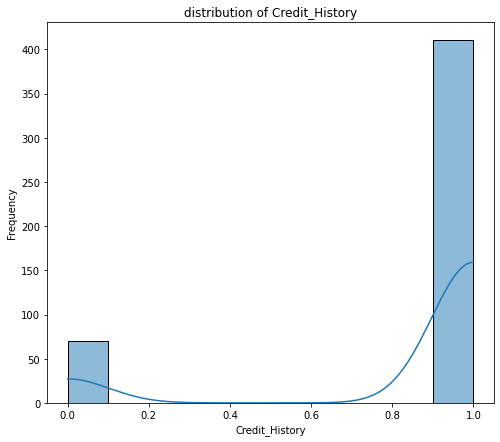

In [68]:
num_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for cols in num_cols:
    plt.figure(figsize = (8,7))
    sns.histplot(df[cols], kde = True)
    plt.title(f'distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    
plt.show()

In [69]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

gender = pd.get_dummies(df['Gender'], drop_first= True)

married = pd.get_dummies(df['Married'], prefix = 'married', drop_first= True)

dependents = pd.get_dummies(df['Dependents'], prefix = 'dependents', drop_first= True)

edu = pd.get_dummies(df['Education'], drop_first= True)

self_employed = pd.get_dummies(df['Self_Employed'], prefix = 'self_employed', drop_first= True)

property_area = pd.get_dummies(df['Property_Area'], drop_first=True)


df = pd.concat([df, gender, married, dependents, edu, self_employed, property_area], axis = 1)

df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis = 1, inplace=True)


df.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   
5             5417             4196.0       267.0             360.0   

   Credit_History Loan_Status  Male  married_Yes  dependents_1  dependents_2  \
1             1.0           N     1            1             1             0   
2             1.0           Y     1            1             0             0   
3             1.0           Y     1            1             0             0   
4             1.0           Y     1            0             0             0   
5             1.0           Y     1            1             0             1   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
1              0             0                  0          0      0  
2              0             0                  1          0      1  
3              0             1                  0          0      1  
4              0             0                  0          0      1  
5              0             0                  1          0      1

In [70]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

df['Loan_Status'].value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

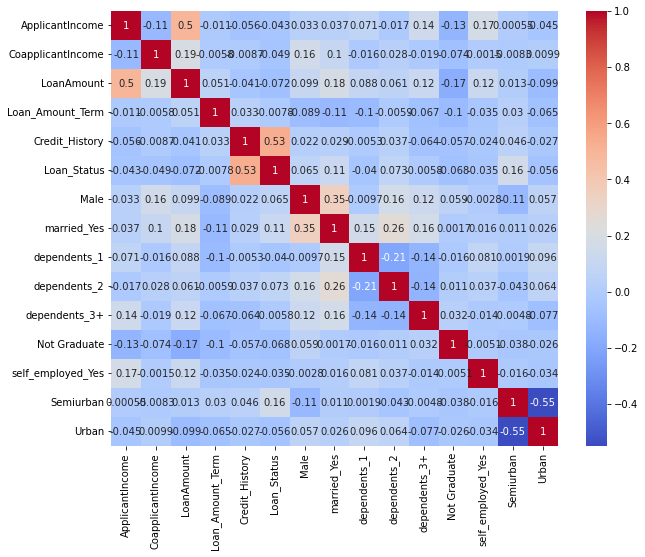

In [71]:
plt.figure(figsize=(10,8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.show()

In [72]:
df.head(3)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   

   Credit_History  Loan_Status  Male  married_Yes  dependents_1  dependents_2  \
1             1.0            0     1            1             1             0   
2             1.0            1     1            1             0             0   
3             1.0            1     1            1             0             0   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
1              0             0                  0          0      0  
2              0             0                  1          0      1  
3              0             1                  0          0      1

In [73]:
X = df.drop(['Loan_Status'], axis = 1)

y = df['Loan_Status']

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [75]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

LogisticRegression()

In [76]:
prediction = logmodel.predict(X_test)

prediction

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [77]:
test = pd.read_csv("/Users/adedayo/Desktop/datasets/test.csv")

test.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [78]:
test.drop(['Loan_ID'], axis = 1, inplace = True)

gender = pd.get_dummies(test['Gender'], drop_first= True)

married = pd.get_dummies(test['Married'], prefix = 'married', drop_first= True)

dependents = pd.get_dummies(test['Dependents'], prefix = 'dependents', drop_first= True)

edu = pd.get_dummies(test['Education'], drop_first= True)

self_employed = pd.get_dummies(test['Self_Employed'], prefix = 'self_employed', drop_first= True)

property_area = pd.get_dummies(test['Property_Area'], drop_first=True)




test = pd.concat([test, gender, married, dependents, edu, self_employed, property_area], axis = 1)

test.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], axis = 1, inplace=True)


test.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History  Male  married_Yes  dependents_1  dependents_2  \
0             1.0     1            1             0             0   
1             1.0     1            1             1             0   
2             1.0     1            1             0             1   
3             NaN     1            1             0             1   
4             1.0     1            0             0             0   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
0              0             0                  0          0      1  
1              0             0                  0          0      1  
2              0             0                  0          0      1  
3              0             0                  0          0      1  
4              0             1                  0          0      1

In [79]:
test.dropna(inplace = True)

test.head()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
4             3276                  0        78.0             360.0   
5             2165               3422       152.0             360.0   

   Credit_History  Male  married_Yes  dependents_1  dependents_2  \
0             1.0     1            1             0             0   
1             1.0     1            1             1             0   
2             1.0     1            1             0             1   
4             1.0     1            0             0             0   
5             1.0     1            1             0             0   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
0              0             0                  0          0      1  
1              0             0                  0          0      1  
2              0             0                  0          0      1  
4              0             1                  0          0      1  
5              0             1                  1          0      1

In [80]:
pred = logmodel.predict(test)

pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.89      0.36      0.52        47
           1       0.79      0.98      0.87       112

    accuracy                           0.80       159
   macro avg       0.84      0.67      0.69       159
weighted avg       0.82      0.80      0.77       159



In [82]:
test

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                  0       110.0             360.0   
1               3076               1500       126.0             360.0   
2               5000               1800       208.0             360.0   
4               3276                  0        78.0             360.0   
5               2165               3422       152.0             360.0   
..               ...                ...         ...               ...   
361             2269               2167        99.0             360.0   
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History  Male  married_Yes  dependents_1  dependents_2  \
0               1.0     1            1             0             0   
1               1.0     1            1             1             0   
2               1.0     1            1             0             1   
4               1.0     1            0             0             0   
5               1.0     1            1             0             0   
..              ...   ...          ...           ...           ...   
361             1.0     1            1             1             0   
362             1.0     1            1             0             0   
363             1.0     1            1             0             0   
365             1.0     1            1             0             0   
366             1.0     1            0             0             0   

     dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
0                0             0                  0          0      1  
1                0             0                  0          0      1  
2                0             0                  0          0      1  
4                0             1                  0          0      1  
5                0             1                  1          0      1  
..             ...           ...                ...        ...    ...  
361              0             0                  0          1      0  
362              1             1                  1          0      1  
363              0             0                  0          0      1  
365              0             0                  0          0      0  
366              0             0                  1          0      0  

[328 rows x 14 columns]

In [83]:
result = pd.DataFrame({'actual':y_test,'predictions':prediction})

result

actual  predictions
92        1            1
529       1            1
505       1            1
358       0            0
512       1            1
..      ...          ...
559       1            1
143       1            1
50        1            1
203       1            1
572       1            1

[159 rows x 2 columns]

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
rfClassifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, random_state=42)

In [86]:
rfClassifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [87]:
randompred = rfClassifier.predict(X_test)

randompred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [88]:
from sklearn.metrics import classification_report

print(classification_report(y_test,randompred))

              precision    recall  f1-score   support

           0       1.00      0.32      0.48        47
           1       0.78      1.00      0.88       112

    accuracy                           0.80       159
   macro avg       0.89      0.66      0.68       159
weighted avg       0.84      0.80      0.76       159



In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
treeclass = DecisionTreeClassifier(random_state=42)

treeclass.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
treepred = treeclass.predict(X_test)

treepred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1])

In [92]:
from sklearn.metrics import classification_report

print(classification_report(y_test,treepred))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53        47
           1       0.80      0.80      0.80       112

    accuracy                           0.72       159
   macro avg       0.67      0.67      0.67       159
weighted avg       0.72      0.72      0.72       159



In [93]:
treeclass.predict(test)

array([0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [94]:
from xgboost import XGBClassifier

In [95]:
xgmodel = XGBClassifier(n_estimator = 100, max_depth = 6)

xgmodel.fit(X_train,y_train)

[16:15:09] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=100,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [96]:
xgmodelpred = xgmodel.predict(X_test)

xgmodelpred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1])

In [97]:
from sklearn.metrics import classification_report

print(classification_report(y_test,xgmodelpred))

              precision    recall  f1-score   support

           0       0.77      0.49      0.60        47
           1       0.81      0.94      0.87       112

    accuracy                           0.81       159
   macro avg       0.79      0.71      0.73       159
weighted avg       0.80      0.81      0.79       159



In [98]:
loan_status = xgmodel.predict(test)

Loan_status = pd.DataFrame({'Loan_status':loan_status})

Loan_status

Loan_status
0              1
1              1
2              1
3              1
4              1
..           ...
323            1
324            1
325            1
326            1
327            1

[328 rows x 1 columns]

In [99]:
test = pd.concat([test,Loan_status], axis =1)

test.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5720.0                0.0       110.0             360.0   
1           3076.0             1500.0       126.0             360.0   
2           5000.0             1800.0       208.0             360.0   
4           3276.0                0.0        78.0             360.0   
5           2165.0             3422.0       152.0             360.0   

   Credit_History  Male  married_Yes  dependents_1  dependents_2  \
0             1.0   1.0          1.0           0.0           0.0   
1             1.0   1.0          1.0           1.0           0.0   
2             1.0   1.0          1.0           0.0           1.0   
4             1.0   1.0          0.0           0.0           0.0   
5             1.0   1.0          1.0           0.0           0.0   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  \
0            0.0           0.0                0.0        0.0    1.0   
1            0.0           0.0                0.0        0.0    1.0   
2            0.0           0.0                0.0        0.0    1.0   
4            0.0           1.0                0.0        0.0    1.0   
5            0.0           1.0                1.0        0.0    1.0   

   Loan_status  
0          1.0  
1          1.0  
2          1.0  
4          1.0  
5          1.0

In [100]:
test['Loan_status'].value_counts()

1.0    253
0.0     75
Name: Loan_status, dtype: int64

In [101]:
importance = rfClassifier.feature_importances_

In [102]:
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df

Feature  Importance
4      Credit_History    0.416566
0     ApplicantIncome    0.151830
2          LoanAmount    0.144829
1   CoapplicantIncome    0.089655
12          Semiurban    0.043949
6         married_Yes    0.025466
5                Male    0.023300
10       Not Graduate    0.019987
3    Loan_Amount_Term    0.019953
13              Urban    0.019493
11  self_employed_Yes    0.015441
7        dependents_1    0.012095
8        dependents_2    0.011204
9       dependents_3+    0.006234

In [103]:
df = pd.read_csv("/Users/adedayo/Desktop/datasets/Default_Fin.csv")

df.head(5)

Index  Employed  Bank Balance  Annual Salary  Defaulted?
0      1         1       8754.36      532339.56           0
1      2         0       9806.16      145273.56           0
2      3         1      12882.60      381205.68           0
3      4         1       6351.00      428453.88           0
4      5         1       9427.92      461562.00           0

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [105]:
df.drop(['Index'], axis = 1, inplace = True)

df.head(5)

Employed  Bank Balance  Annual Salary  Defaulted?
0         1       8754.36      532339.56           0
1         0       9806.16      145273.56           0
2         1      12882.60      381205.68           0
3         1       6351.00      428453.88           0
4         1       9427.92      461562.00           0

In [106]:
df['Defaulted?'].value_counts()

0    9667
1     333
Name: Defaulted?, dtype: int64

In [107]:
df.describe()

Employed  Bank Balance  Annual Salary    Defaulted?
count  10000.000000  10000.000000   10000.000000  10000.000000
mean       0.705600  10024.498524  402203.782224      0.033300
std        0.455795   5804.579486  160039.674988      0.179428
min        0.000000      0.000000    9263.640000      0.000000
25%        0.000000   5780.790000  256085.520000      0.000000
50%        1.000000   9883.620000  414631.740000      0.000000
75%        1.000000  13995.660000  525692.760000      0.000000
max        1.000000  31851.840000  882650.760000      1.000000

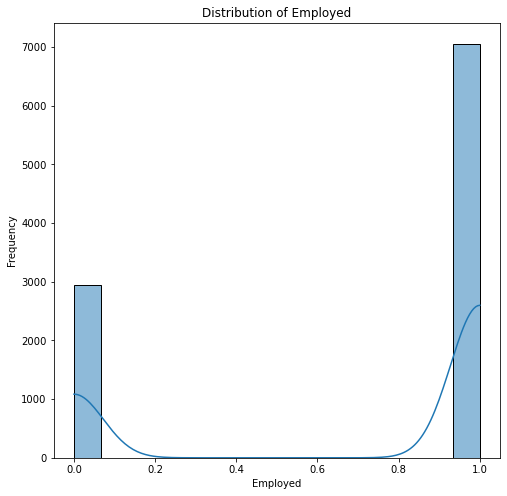

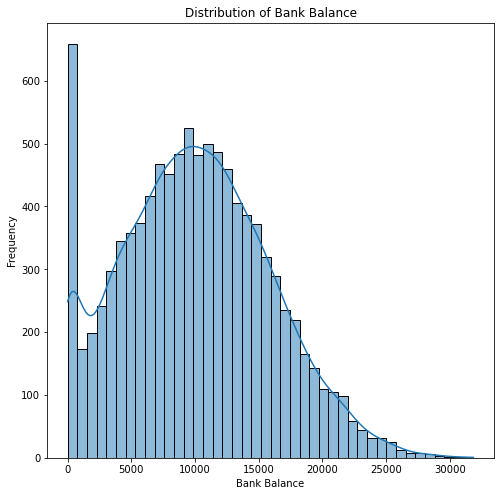

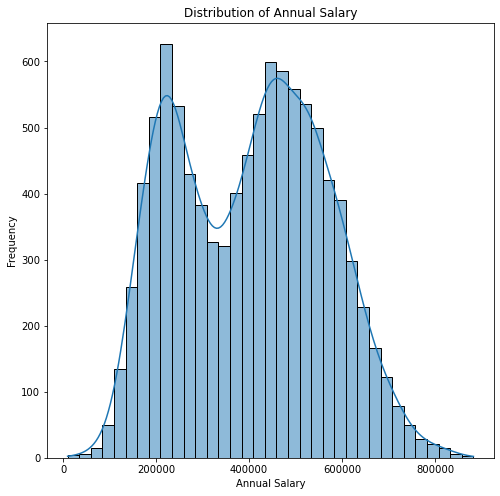

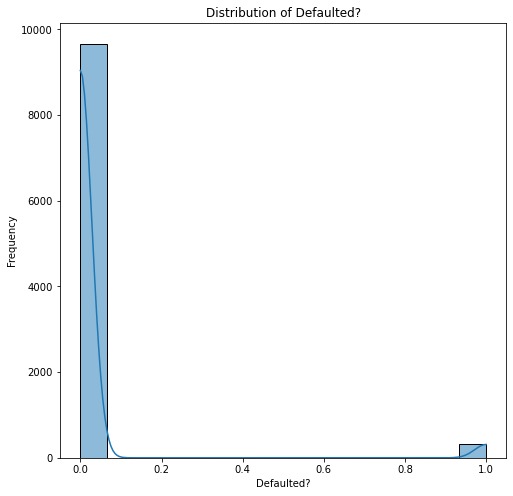

In [108]:
num_cols = ['Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?']

for cols in num_cols:
    plt.figure(figsize = (8,8))
    sns.histplot(df[cols], kde = True)
    plt.title(f'Distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')
    
plt.show()

<AxesSubplot:>

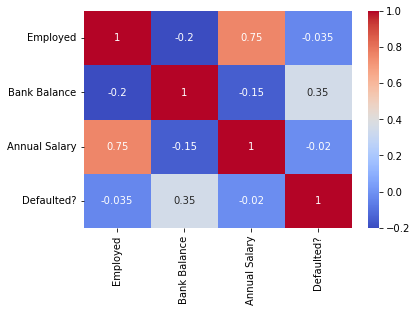

In [109]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [110]:
X = df.drop(['Defaulted?'], axis = 1)

y = df['Defaulted?']

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression()

In [114]:
logprediction = logmodel.predict(X_test)

logprediction

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
print(classification_report(y_test,logprediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3190
           1       0.00      0.00      0.00       110

    accuracy                           0.97      3300
   macro avg       0.48      0.50      0.49      3300
weighted avg       0.93      0.97      0.95      3300



In [116]:
result = pd.DataFrame({'Actual':y_test, 'Prediction':logprediction})

result

Actual  Prediction
6252       0           0
4684       0           0
1731       0           0
4742       0           0
4521       0           0
...      ...         ...
1744       0           0
9754       0           0
6094       0           0
8781       0           0
9401       0           0

[3300 rows x 2 columns]

In [117]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
rfClassifier = RandomForestClassifier(n_estimators = 100, min_samples_split=2, min_samples_leaf=4, random_state=42)


In [119]:
rfClassifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [120]:
rfpred = rfClassifier.predict(X_test)

rfpred

array([0, 0, 0, ..., 0, 1, 0])

In [121]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3190
           1       0.56      0.33      0.41       110

    accuracy                           0.97      3300
   macro avg       0.77      0.66      0.70      3300
weighted avg       0.96      0.97      0.97      3300



In [122]:
from sklearn.tree import DecisionTreeClassifier

In [123]:
dtree = DecisionTreeClassifier(random_state=42)

In [124]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [125]:
treepred = dtree.predict(X_test)

treepred

array([0, 0, 0, ..., 0, 1, 0])

In [126]:
print(classification_report(y_test,treepred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3190
           1       0.34      0.35      0.34       110

    accuracy                           0.96      3300
   macro avg       0.66      0.66      0.66      3300
weighted avg       0.96      0.96      0.96      3300



In [127]:
from xgboost import XGBClassifier

In [128]:
xgmodel = XGBClassifier(n_estimators = 100, max_depth = 6)

In [129]:
xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [130]:
xgpred = xgmodel.predict(X_test)

xgpred

array([0, 0, 0, ..., 0, 1, 0])

In [131]:
print(classification_report(y_test,xgpred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3190
           1       0.56      0.36      0.44       110

    accuracy                           0.97      3300
   macro avg       0.77      0.68      0.71      3300
weighted avg       0.96      0.97      0.97      3300



In [132]:
importance = rfClassifier.feature_importances_

In [133]:
importance_df = pd.DataFrame({'features':X_train.columns, 'importance':importance})

importance_df

features  importance
0       Employed    0.007111
1   Bank Balance    0.793634
2  Annual Salary    0.199255

In [134]:
train = pd.read_csv("/Users/adedayo/Desktop/datasets/Training Data.csv")

train.head(5)

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

            Profession                 CITY           STATE  CURRENT_JOB_YRS  \
0  Mechanical_engineer                 Rewa  Madhya_Pradesh                3   
1   Software_Developer             Parbhani     Maharashtra                9   
2     Technical_writer            Alappuzha          Kerala                4   
3   Software_Developer          Bhubaneswar          Odisha                2   
4        Civil_servant  Tiruchirappalli[10]      Tamil_Nadu                3   

   CURRENT_HOUSE_YRS  Risk_Flag  
0                 13          0  
1                 13          0  
2                 10          0  
3                 12          1  
4                 14          1

In [135]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [136]:
train.drop(['Profession', 'CITY', 'STATE'], axis = 1, inplace = True)

In [137]:
train.head(5)

Id   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  1303834   23           3         single          rented            no   
1   2  7574516   40          10         single          rented            no   
2   3  3991815   66           4        married          rented            no   
3   4  6256451   41           2         single          rented           yes   
4   5  5768871   47          11         single          rented            no   

   CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  
0                3                 13          0  
1                9                 13          0  
2                4                 10          0  
3                2                 12          1  
4                3                 14          1

In [138]:
house_ownership = pd.get_dummies(train['House_Ownership'], drop_first = True)

marital_status = pd.get_dummies(train['Married/Single'], drop_first = True)

own_car = pd.get_dummies(train['Car_Ownership'], prefix = 'car', drop_first = True)

train = pd.concat([train,house_ownership,marital_status,own_car],axis =1)

train.drop(['House_Ownership','Married/Single','Car_Ownership', 'Id'], axis = 1, inplace = True)


train.head(3)

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag  \
0  1303834   23           3                3                 13          0   
1  7574516   40          10                9                 13          0   
2  3991815   66           4                4                 10          0   

   owned  rented  single  car_yes  
0      0       1       1        0  
1      0       1       1        0  
2      0       1       0        0

In [139]:
X = train.drop(['Risk_Flag'], axis = 1)

y = train['Risk_Flag']

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression()

In [144]:
logpredict = logmodel.predict(X_test)

logpredict

array([0, 0, 0, ..., 0, 0, 0])

In [145]:
from sklearn.metrics import classification_report

print(classification_report(y_test,logpredict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     72999
           1       0.00      0.00      0.00     10161

    accuracy                           0.88     83160
   macro avg       0.44      0.50      0.47     83160
weighted avg       0.77      0.88      0.82     83160



/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rfclassifier = RandomForestClassifier(n_estimators = 100, min_samples_split=2, min_samples_leaf=4, random_state = 42)

rfclassifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [148]:
rfpred = rfclassifier.predict(X_test)

rfpred

array([0, 0, 0, ..., 1, 0, 0])

In [149]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     72999
           1       0.60      0.49      0.54     10161

    accuracy                           0.90     83160
   macro avg       0.77      0.72      0.74     83160
weighted avg       0.89      0.90      0.89     83160



In [150]:
from sklearn.tree import DecisionTreeClassifier

In [151]:
treemodel = DecisionTreeClassifier(random_state=42)

treemodel.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [152]:
treepred = treemodel.predict(X_test)

treepred

array([0, 0, 0, ..., 1, 0, 0])

In [153]:
from sklearn.metrics import classification_report

print(classification_report(y_test,treepred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     72999
           1       0.51      0.58      0.54     10161

    accuracy                           0.88     83160
   macro avg       0.72      0.75      0.74     83160
weighted avg       0.89      0.88      0.88     83160



In [154]:
from xgboost import XGBClassifier

In [155]:
xgmodel = XGBClassifier(n_estimators = 100, max_depth = 4)

xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [156]:
xgpred = xgmodel.predict(X_test)

xgpred

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
from sklearn.metrics import classification_report

print(classification_report(y_test,xgpred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     72999
           1       0.69      0.03      0.05     10161

    accuracy                           0.88     83160
   macro avg       0.79      0.51      0.49     83160
weighted avg       0.86      0.88      0.83     83160



In [158]:
importance = rfclassifier.feature_importances_

In [159]:
importance_df = pd.DataFrame({'Feature':X_train.columns, 'Importance':importance})

importance_df

Feature  Importance
0             Income    0.394846
1                Age    0.265404
2         Experience    0.112968
3    CURRENT_JOB_YRS    0.098587
4  CURRENT_HOUSE_YRS    0.088389
5              owned    0.004290
6             rented    0.008472
7             single    0.012926
8            car_yes    0.014118

In [160]:
test = pd.read_csv("/Users/adedayo/Desktop/datasets/Test Data.csv")

test.head(5)

ID   Income  Age  Experience Married/Single House_Ownership Car_Ownership  \
0   1  7393090   59          19         single          rented            no   
1   2  1215004   25           5         single          rented            no   
2   3  8901342   50          12         single          rented            no   
3   4  1944421   49           9        married          rented           yes   
4   5    13429   25          18         single          rented           yes   

    Profession        CITY        STATE  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  
0    Geologist       Malda  West Bengal                4                 13  
1  Firefighter       Jalna  Maharashtra                5                 10  
2       Lawyer       Thane  Maharashtra                9                 14  
3      Analyst       Latur  Maharashtra                3                 12  
4     Comedian  Berhampore  West Bengal               13                 11

In [161]:
house_ownership = pd.get_dummies(test['House_Ownership'], drop_first = True)

marital_status = pd.get_dummies(test['Married/Single'], drop_first = True)

own_car = pd.get_dummies(test['Car_Ownership'], prefix = 'car', drop_first = True)

test = pd.concat([test,house_ownership,marital_status,own_car],axis =1)

test.drop(['House_Ownership','Married/Single','Car_Ownership', 'ID', 'Profession',
          'CITY', 'STATE'], axis = 1, inplace = True)


test.head(3)

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  owned  \
0  7393090   59          19                4                 13      0   
1  1215004   25           5                5                 10      0   
2  8901342   50          12                9                 14      0   

   rented  single  car_yes  
0       1       1        0  
1       1       1        0  
2       1       1        0

In [162]:
risk_flag = rfclassifier.predict(test)

risk_flag = pd.DataFrame({'risk_flag':risk_flag})

risk_flag

risk_flag
0              0
1              0
2              0
3              0
4              0
...          ...
27995          0
27996          0
27997          0
27998          0
27999          0

[28000 rows x 1 columns]

In [163]:
test = pd.concat([test,risk_flag], axis = 1)

test

Income  Age  Experience  CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  owned  \
0      7393090   59          19                4                 13      0   
1      1215004   25           5                5                 10      0   
2      8901342   50          12                9                 14      0   
3      1944421   49           9                3                 12      0   
4        13429   25          18               13                 11      0   
...        ...  ...         ...              ...                ...    ...   
27995  9955481   57          13                5                 10      0   
27996  2917765   47           9                9                 14      0   
27997  8082415   24           5                4                 13      0   
27998  9474180   51          13               13                 14      0   
27999  9250350   42           9                4                 10      0   

       rented  single  car_yes  risk_flag  
0           1       1        0          0  
1           1       1        0          0  
2           1       1        0          0  
3           1       0        1          0  
4           1       1        1          0  
...       ...     ...      ...        ...  
27995       1       1        0          0  
27996       1       1        0          0  
27997       1       1        0          0  
27998       1       1        1          0  
27999       1       1        0          0  

[28000 rows x 10 columns]

In [164]:
test['risk_flag'].value_counts()

0    25159
1     2841
Name: risk_flag, dtype: int64

In [165]:
df = pd.read_csv("/Users/adedayo/Downloads/archive (9)/training_set.csv")

df.head(5)

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5849.0                0.0         NaN             360.0   
1              NaN             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   

   Credit_History property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [167]:
df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 2 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            476 non-null    object 
 1   Gender             476 non-null    object 
 2   Married            476 non-null    object 
 3   Dependents         476 non-null    object 
 4   Education          476 non-null    object 
 5   Self_Employed      476 non-null    object 
 6   ApplicantIncome    476 non-null    float64
 7   CoapplicantIncome  476 non-null    float64
 8   LoanAmount         476 non-null    float64
 9   Loan_Amount_Term   476 non-null    float64
 10  Credit_History     476 non-null    float64
 11  property_Area      476 non-null    object 
 12  Loan_Status        476 non-null    object 
dtypes: float64(5), object(8)
memory usage: 52.1+ KB


In [168]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

In [169]:
gender = pd.get_dummies(df['Gender'], drop_first=True)

married = pd.get_dummies(df['Married'], prefix = 'married', drop_first=True)

dependents = pd.get_dummies(df['Dependents'], prefix = 'dependents', drop_first = True)

edu = pd.get_dummies(df['Education'], drop_first=True)

self_employed = pd.get_dummies(df['Self_Employed'], prefix = 'self_employed', drop_first=True)

property_area = pd.get_dummies(df['property_Area'], drop_first=True)


df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})


df.drop(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area'], axis = 1, inplace = True)

df = pd.concat([df,gender,married,dependents,edu,self_employed, property_area], axis = 1)


df.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   
6           2333.0             1516.0        95.0             360.0   
7           3036.0             2504.0       158.0             360.0   

   Credit_History  Loan_Status  Male  married_Yes  dependents_1  dependents_2  \
2             1.0            1     1            1             0             0   
3             1.0            1     1            1             0             0   
4             1.0            1     1            0             0             0   
6             1.0            1     1            1             0             0   
7             0.0            0     1            1             0             0   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
2              0             0                  1          0      1  
3              0             1                  0          0      1  
4              0             0                  0          0      1  
6              0             1                  0          0      1  
7              1             0                  0          1      0

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 476 entries, 2 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    476 non-null    float64
 1   CoapplicantIncome  476 non-null    float64
 2   LoanAmount         476 non-null    float64
 3   Loan_Amount_Term   476 non-null    float64
 4   Credit_History     476 non-null    float64
 5   Loan_Status        476 non-null    int64  
 6   Male               476 non-null    uint8  
 7   married_Yes        476 non-null    uint8  
 8   dependents_1       476 non-null    uint8  
 9   dependents_2       476 non-null    uint8  
 10  dependents_3+      476 non-null    uint8  
 11  Not Graduate       476 non-null    uint8  
 12  self_employed_Yes  476 non-null    uint8  
 13  Semiurban          476 non-null    uint8  
 14  Urban              476 non-null    uint8  
dtypes: float64(5), int64(1), uint8(9)
memory usage: 30.2 KB


In [171]:
X = df.drop(['Loan_Status'], axis = 1)

y = df['Loan_Status']

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rfclassifier = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=4, random_state=42)

rfclassifier.fit(X_train,y_train)

RandomForestClassifier(min_samples_leaf=4, random_state=42)

In [176]:
rfpred = rfclassifier.predict(X_test)

rfpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [177]:
from sklearn.metrics import classification_report

print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.94      0.32      0.48        47
           1       0.77      0.99      0.87       111

    accuracy                           0.79       158
   macro avg       0.86      0.66      0.67       158
weighted avg       0.82      0.79      0.75       158



In [178]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression()

In [179]:
logpred = logmodel.predict(X_test)


logpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [180]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.94      0.34      0.50        47
           1       0.78      0.99      0.87       111

    accuracy                           0.80       158
   macro avg       0.86      0.67      0.69       158
weighted avg       0.83      0.80      0.76       158



In [181]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [182]:
dpred = dtree.predict(X_test)

dpred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1])

In [183]:
print(classification_report(y_test,dpred))

              precision    recall  f1-score   support

           0       0.50      0.53      0.52        47
           1       0.80      0.77      0.79       111

    accuracy                           0.70       158
   macro avg       0.65      0.65      0.65       158
weighted avg       0.71      0.70      0.71       158



In [184]:
from xgboost import XGBClassifier

xgmodel = XGBClassifier(n_estimators = 50, max_depth = 6)

xgmodel.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [185]:
xgpred = xgmodel.predict(X_test)

xgpred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1])

In [186]:
print(classification_report(y_test,xgpred))

              precision    recall  f1-score   support

           0       0.65      0.47      0.54        47
           1       0.80      0.89      0.84       111

    accuracy                           0.77       158
   macro avg       0.72      0.68      0.69       158
weighted avg       0.75      0.77      0.75       158



In [187]:
test = pd.read_csv("/Users/adedayo/Downloads/archive (9)/testing_set.csv")

test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [188]:
gender = pd.get_dummies(test['Gender'], drop_first=True)

married = pd.get_dummies(test['Married'], prefix = 'married', drop_first=True)

dependents = pd.get_dummies(test['Dependents'], prefix = 'dependents', drop_first = True)

edu = pd.get_dummies(test['Education'], drop_first=True)

self_employed = pd.get_dummies(test['Self_Employed'], prefix = 'self_employed', drop_first=True)

property_area = pd.get_dummies(test['property_Area'], drop_first=True)


test.dropna(inplace = True)

loan_id = test['Loan_ID']

loan_id = pd.DataFrame({'loan_id':loan_id})


test.drop(['Gender', 'Loan_ID', 'Married', 'Dependents', 'Education', 'Self_Employed', 'property_Area'], axis = 1, inplace = True)

test = pd.concat([test,gender,married,dependents,edu,self_employed, property_area], axis = 1)


test.head(5)

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           5720.0                0.0       110.0             360.0   
1           3076.0             1500.0       126.0             360.0   
2           5000.0             1800.0       208.0             360.0   
4           3276.0                0.0        78.0             360.0   
5           2165.0             3422.0       152.0             360.0   

   Credit_History  Male  married_Yes  dependents_1  dependents_2  \
0             1.0     1            1             0             0   
1             1.0     1            1             1             0   
2             1.0     1            1             0             1   
4             1.0     1            0             0             0   
5             1.0     1            1             0             0   

   dependents_3+  Not Graduate  self_employed_Yes  Semiurban  Urban  
0              0             0                  0          0      1  
1              0             0                  0          0      1  
2              0             0                  0          0      1  
4              0             1                  0          0      1  
5              0             1                  1          0      1

In [189]:
test.dropna(inplace = True)

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    289 non-null    float64
 1   CoapplicantIncome  289 non-null    float64
 2   LoanAmount         289 non-null    float64
 3   Loan_Amount_Term   289 non-null    float64
 4   Credit_History     289 non-null    float64
 5   Male               289 non-null    uint8  
 6   married_Yes        289 non-null    uint8  
 7   dependents_1       289 non-null    uint8  
 8   dependents_2       289 non-null    uint8  
 9   dependents_3+      289 non-null    uint8  
 10  Not Graduate       289 non-null    uint8  
 11  self_employed_Yes  289 non-null    uint8  
 12  Semiurban          289 non-null    uint8  
 13  Urban              289 non-null    uint8  
dtypes: float64(5), uint8(9)
memory usage: 16.1 KB


In [190]:
logpred = logmodel.predict(test)

logpred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [191]:
loan_status = pd.DataFrame({'loan_status':logpred})
loan_status = loan_status.reset_index(drop=True)

loan_status

loan_status
0              1
1              1
2              1
3              1
4              1
..           ...
284            1
285            1
286            1
287            1
288            1

[289 rows x 1 columns]

In [192]:
loan_id = loan_id.reset_index(drop=True)

loan_id

loan_id
0    LP001015
1    LP001022
2    LP001031
3    LP001051
4    LP001054
..        ...
284  LP002969
285  LP002971
286  LP002975
287  LP002986
288  LP002989

[289 rows x 1 columns]

In [193]:

result = pd.concat([loan_id, loan_status], axis=1)

result

loan_id  loan_status
0    LP001015            1
1    LP001022            1
2    LP001031            1
3    LP001051            1
4    LP001054            1
..        ...          ...
284  LP002969            1
285  LP002971            1
286  LP002975            1
287  LP002986            1
288  LP002989            1

[289 rows x 2 columns]

In [194]:
df = pd.read_csv("/Users/adedayo/Downloads/advertising.csv")

df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


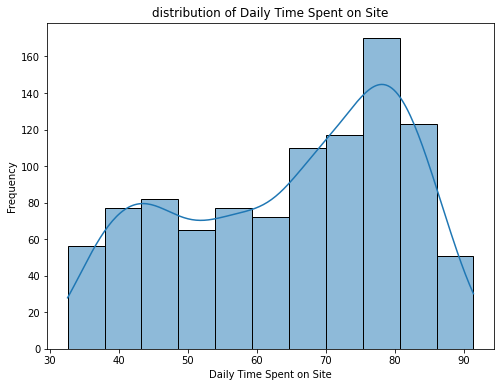

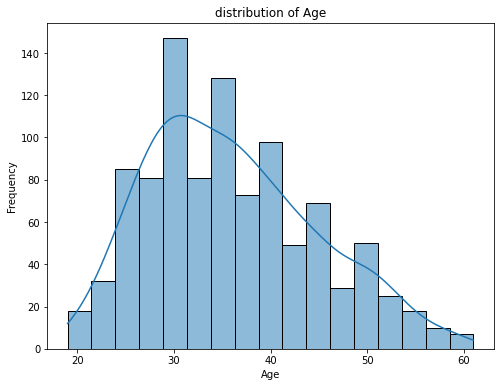

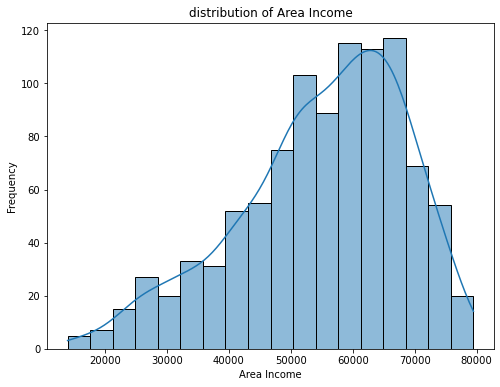

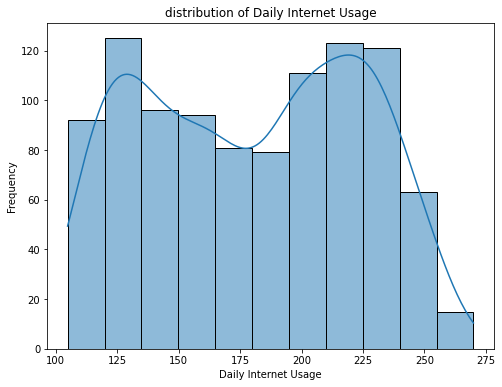

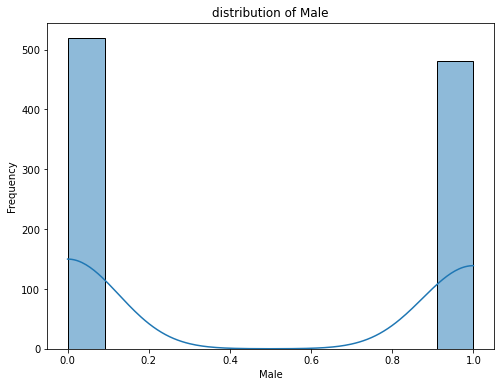

In [196]:
num_cols = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
           'Male']

for cols in num_cols:
    plt.figure(figsize = (8,6))
    sns.histplot(df[cols], kde = True)
    plt.title(f'distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')

    plt.show()

/Users/adedayo/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Male', ylabel='count'>

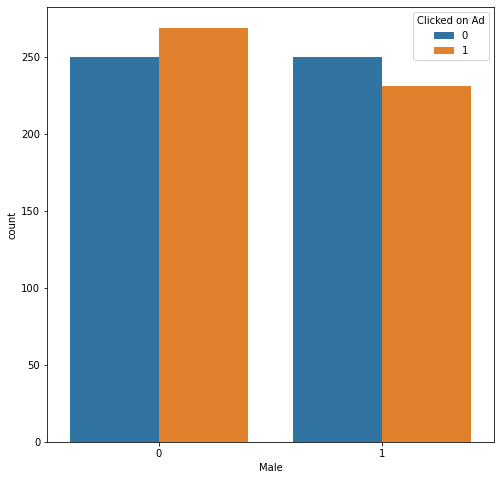

In [197]:
plt.figure(figsize=(8,8))

sns.countplot(df['Male'], hue = df['Clicked on Ad'])

<AxesSubplot:xlabel='Age', ylabel='Area Income'>

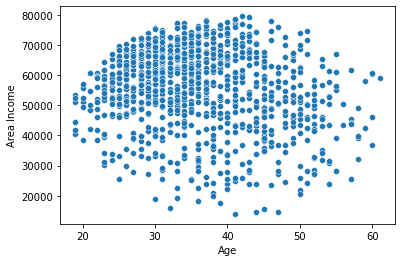

In [198]:
sns.scatterplot(x = df['Age'], y = df['Area Income'])

([<matplotlib.patches.Wedge at 0x7fd96e2d4610>,
 [Text(-0.06581006106899742, 1.098029615202657, '0'),
  Text(0.06581006106899753, -1.098029615202657, '1')],
 [Text(-0.03589639694672586, 0.5989252446559946, '51.9%'),
  Text(0.035896396946725924, -0.5989252446559946, '48.1%')])

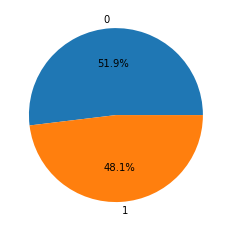

In [199]:
gender_rate = df.groupby('Male')['Clicked on Ad'].mean()

plt.pie(x = gender_rate, labels = gender_rate.index, autopct = '%1.1f%%')

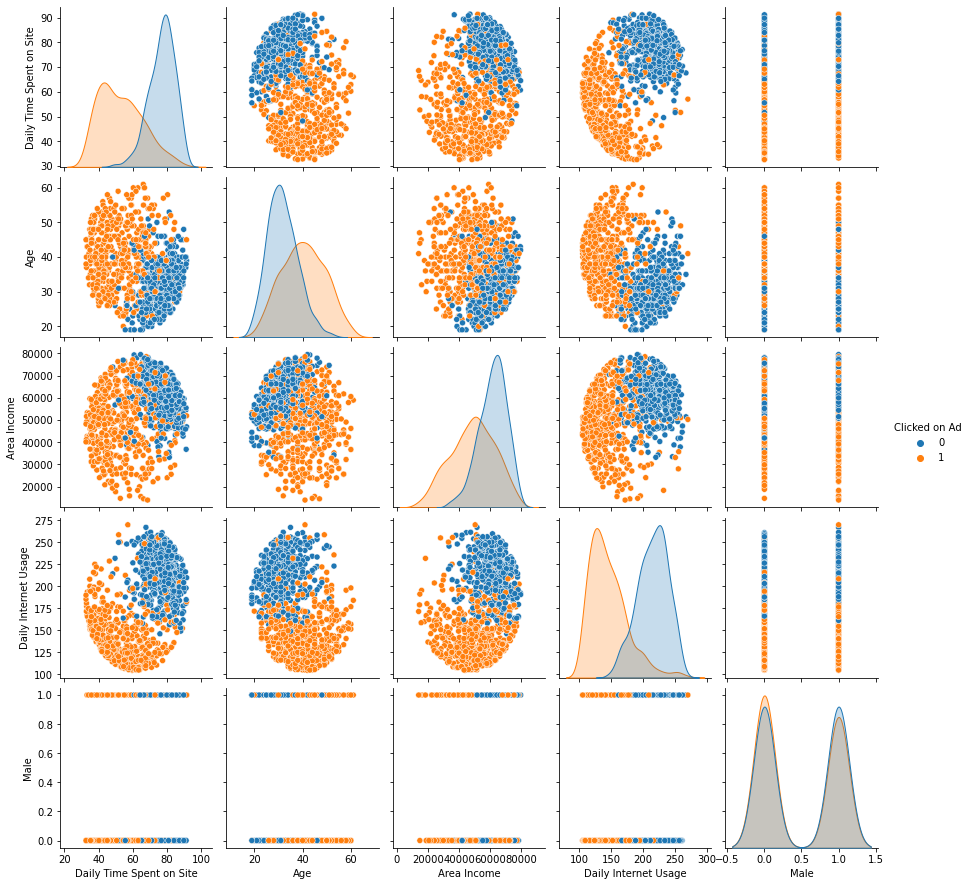

In [200]:
sns.pairplot(df, hue = 'Clicked on Ad')

<AxesSubplot:>

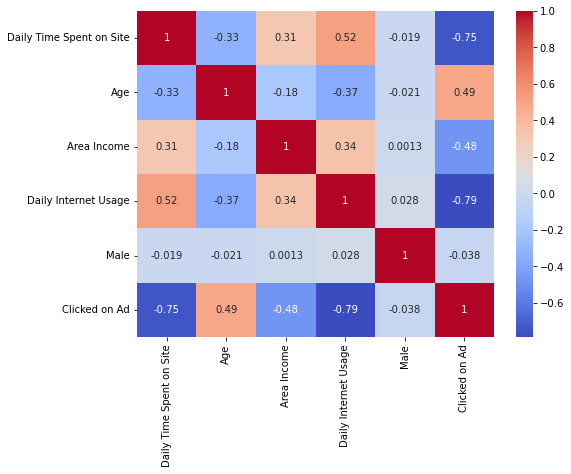

In [201]:
plt.figure(figsize = (8,6))

sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

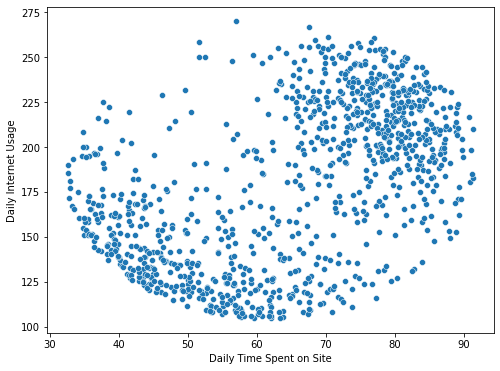

In [202]:
plt.figure(figsize = (8,6))

sns.scatterplot(x = df['Daily Time Spent on Site'], y = df['Daily Internet Usage'])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [204]:
df.drop(['City', 'Country', 'Ad Topic Line', 'Timestamp'], axis = 1, inplace = True)

In [205]:
X = df.drop(['Clicked on Ad'], axis = 1)

y = df['Clicked on Ad']

In [206]:
from sklearn.model_selection import train_test_split

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [208]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()

logmodel.fit(X_train,y_train)

LogisticRegression()

In [209]:
logpred = logmodel.predict(X_test)

logpred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,

In [210]:
print(classification_report(y_test,logpred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330



In [211]:
df = pd.read_csv("/Users/adedayo/Downloads/USA_Housing.csv")

df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [213]:
df.drop(['Address'], axis = 1, inplace = True)

In [214]:
df.head(3)

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   

   Avg. Area Number of Bedrooms  Area Population         Price  
0                          4.09     23086.800503  1.059034e+06  
1                          3.09     40173.072174  1.505891e+06  
2                          5.13     36882.159400  1.058988e+06

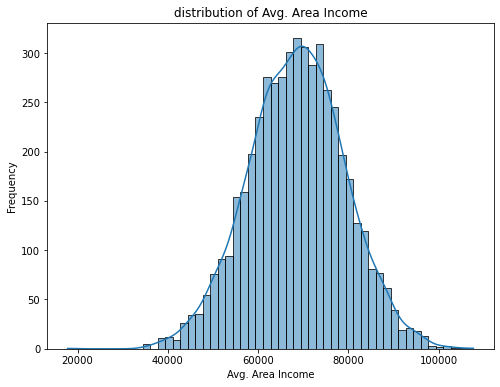

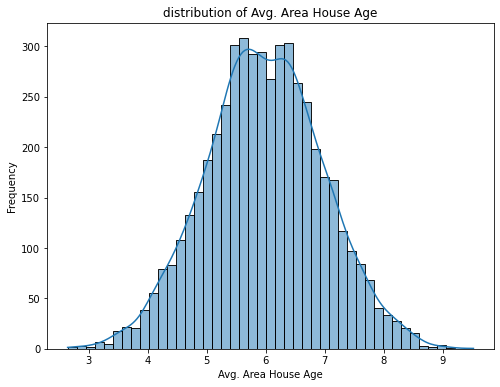

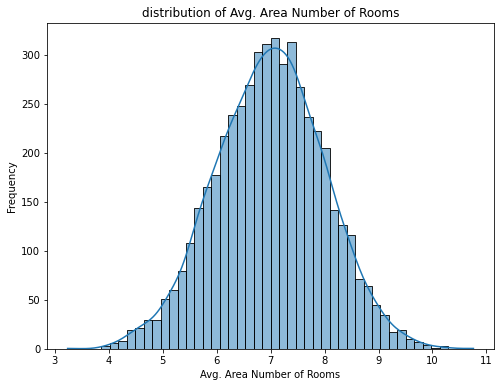

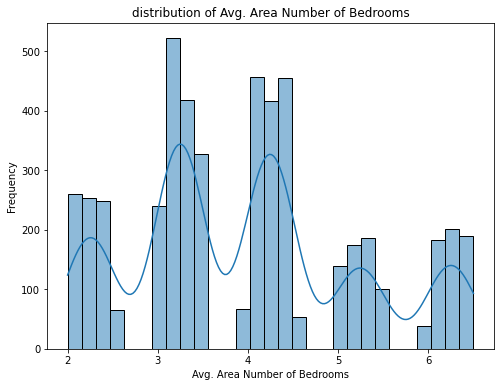

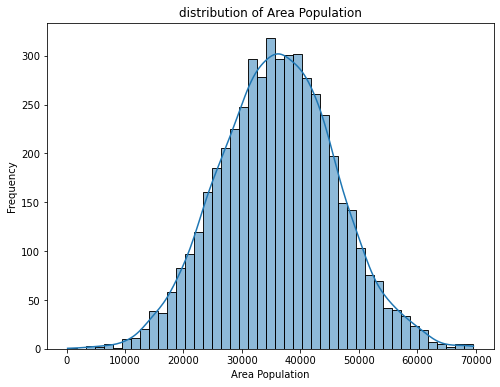

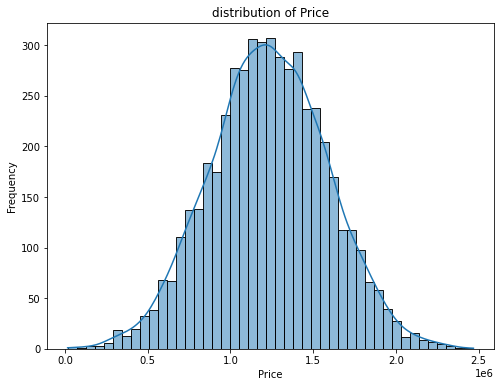

In [215]:
num_cols = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms',
           'Area Population', 'Price']


for cols in num_cols:
    plt.figure(figsize = (8,6))
    sns.histplot(df[cols], kde = True)
    plt.title(f'distribution of {cols}')
    plt.xlabel(cols)
    plt.ylabel('Frequency')

plt.show()

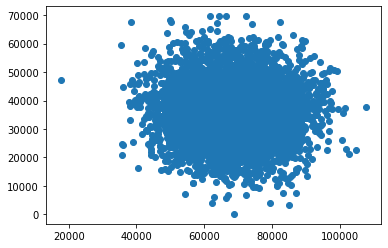

In [216]:
plt.scatter(x = df['Avg. Area Income'], y = df['Area Population'])

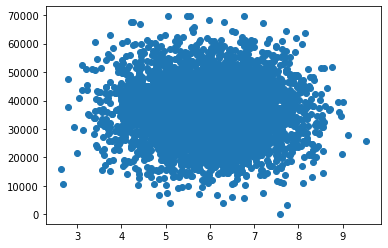

In [217]:
plt.scatter(x = df['Avg. Area House Age'], y = df['Area Population'])

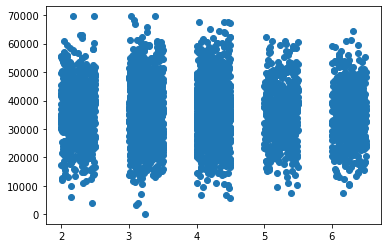

In [218]:
plt.scatter(x = df['Avg. Area Number of Bedrooms'], y = df['Area Population'])

<AxesSubplot:>

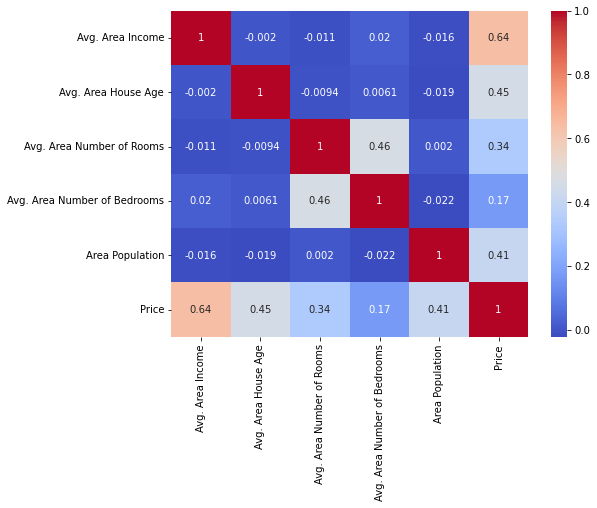

In [219]:
plt.figure(figsize = (8,6))

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

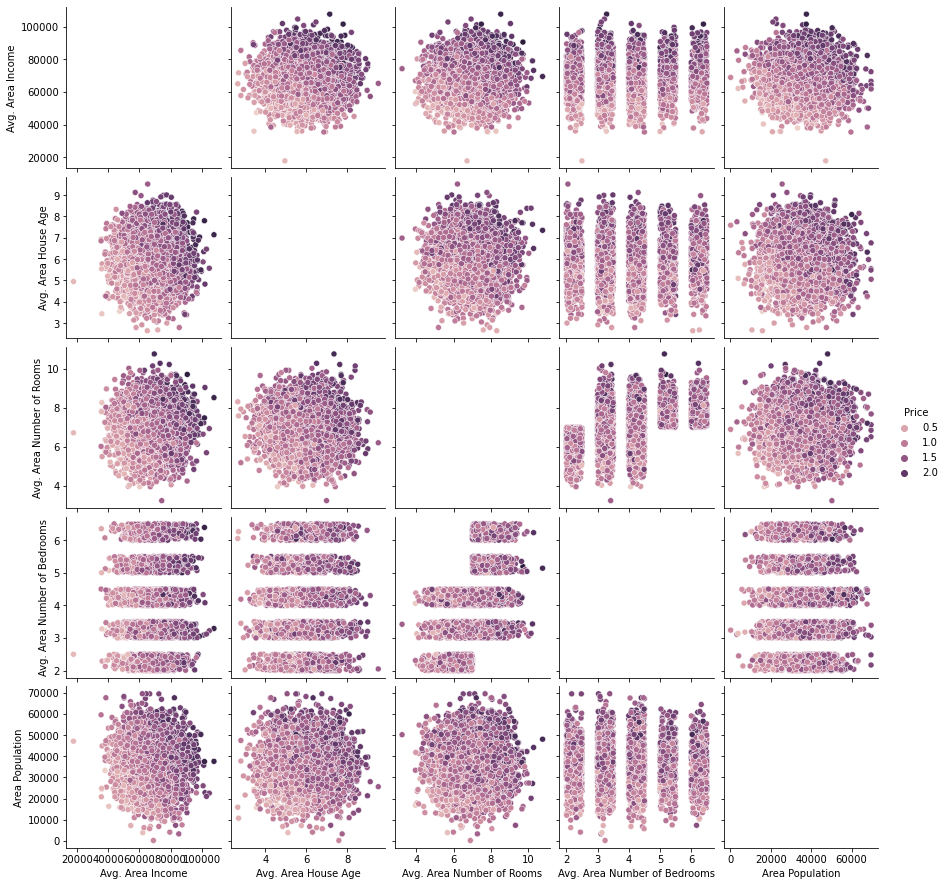

In [220]:
sns.pairplot(df, hue = 'Price')

In [221]:
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4.09     23086.800503  1.059034e+06  
1                             3.09     40173.072174  1.505891e+06  
2                             5.13     36882.159400  1.058988e+06  
3                             3.26     34310.242831  1.260617e+06  
4                             4.23     26354.109472  6.309435e+05  
...                            ...              ...           ...  
4995                          3.46     22837.361035  1.060194e+06  
4996                          4.02     25616.115489  1.482618e+06  
4997                          2.13     33266.145490  1.030730e+06  
4998                          5.44     42625.620156  1.198657e+06  
4999                          4.07     46501.283803  1.298950e+06  

[5000 rows x 6 columns]

In [222]:
X = df.drop(['Price'], axis = 1)

y = df['Price']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [224]:
from sklearn.linear_model import LinearRegression

linmodel = LinearRegression()

linmodel.fit(X_train, y_train)

LinearRegression()

In [225]:
linpred = linmodel.predict(X_test)

linpred

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

In [226]:
linmodel.intercept_

-2640159.79685191

In [227]:
coef_df = pd.DataFrame(linmodel.coef_,X.columns, columns = ['Coefficient'])

coef_df

Coefficient
Avg. Area Income                  21.528276
Avg. Area House Age           164883.282027
Avg. Area Number of Rooms     122368.678027
Avg. Area Number of Bedrooms    2233.801864
Area Population                   15.150420

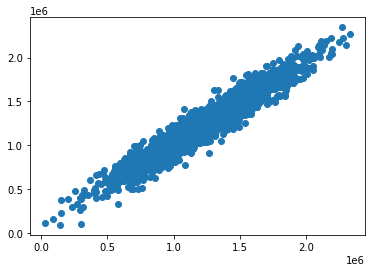

In [228]:
plt.scatter(y_test,linpred)

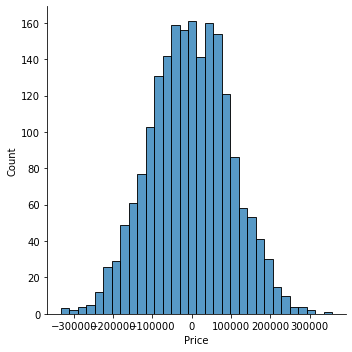

In [229]:
sns.displot((y_test-linpred))

In [230]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,linpred))
print('MSE:', metrics.mean_squared_error(y_test, linpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linpred)))

MAE: 82288.22251914954
MSE: 10460958907.209501
RMSE: 102278.82922291153
